<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/ML_DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание «Проблема качества данных»


Цель: применить на практике методы по оценке качества данных.

Описание задания:
Проведите очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

Этапы работы:

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.
*Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

Форма выполнения:

ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:

Jupyter Notebook/Google Colab;
GitHub;
датасет.
Срок выполнения: дедлайн приема решений на проверку

Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

## 1. Получите и загрузите данные.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import svm

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
pm = r'/content/drive/My Drive/ML/ML_DZ/ML_DZ_4/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
f_1 = 'train.csv'

In [6]:
df = pd.read_csv(f'{pm}{f_1}', sep = ',')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Числовые данные (Numeric Data).**

**int64 (целые числа):**

Survived (выжил/не выжил) — категориальная переменная, представленная числами (например, 0/1);

Pclass (класс билета) — категориальная переменная, представленная числами (1, 2, 3);

SibSp (количество братьев/сестер/супругов) — количественная переменная;

Parch (количество родителей/детей) — количественная переменная.

**float64 (числа с плавающей точкой):**

Age (возраст) — непрерывная количественная переменная;

Fare (стоимость билета) — непрерывная количественная переменная.

**Категориальные данные (Categorical Data)**

**object (строковые/текстовые данные):**

Name (имя) — номинальная категориальная переменная;

Sex (пол) — номинальная категориальная переменная (мужской/женский);

Ticket (номер билета) — номинальная категориальная переменная;

Cabin (каюта) — номинальная категориальная переменная;

Embarked (пункт посадки) — номинальная категориальная переменная.

In [8]:
# Уникальные значения столбцов
print(df['Survived'].unique())
print(df['Pclass'].unique())
print(df['Name'].unique())
print(df['Sex'].unique())
print(df['Age'].unique())
print(df['SibSp'].unique())
print(df['Parch'].unique())
print(df['Ticket'].unique())
print(df['Fare'].unique())
print(df['Cabin'].unique())
print(df['Embarked'].unique())

[0 1]
[3 1 2]
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Ne

In [9]:
# Проверка пропусков
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#удаляем категориальные переменные
df.drop(['Name','Sex','Ticket', 'Cabin','Embarked','PassengerId'], axis=1, inplace=True)

In [11]:
#удалим пропущенные значения
df = df.dropna()

In [12]:
# Расчитаем пропуски в %
(df.isna().mean() * 100).round(2)

,0
Survived,0.0
Pclass,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0


In [13]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [14]:
# Загрузка данных

X = df[['Age', 'SibSp', 'Parch','Fare','Pclass']]
Y = df['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

# Обучение модели
model = LogisticRegression().fit(X_train, Y_train)


In [16]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Для бинарной классификации
pred_proba = model.predict_proba(X_test)[:, 1]  # вероятности положительного класса
pred_classes = model.predict(X_test)  # предсказанные классы

accuracy = accuracy_score(Y_test, pred_classes)
f1 = f1_score(Y_test, pred_classes)
roc_auc = roc_auc_score(Y_test, pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 0.6993
F1 score: 0.5474
ROC AUC: 0.7228


In [17]:
model.predict(X_test)[:5]

array([0, 1, 0, 1, 0])

In [18]:
predictions = model.predict_proba(X_test)

In [19]:
predictions[:5]

array([[0.69678028, 0.30321972],
       [0.23889494, 0.76110506],
       [0.59959906, 0.40040094],
       [0.19068073, 0.80931927],
       [0.88478929, 0.11521071]])

In [20]:
print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))


Weights: [[-0.05187425 -0.29557864  0.24137917  0.00380239 -1.1297945 ]]
Bias: [3.55686394]


In [21]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [22]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [23]:
import matplotlib.pyplot as plt
import numpy as np

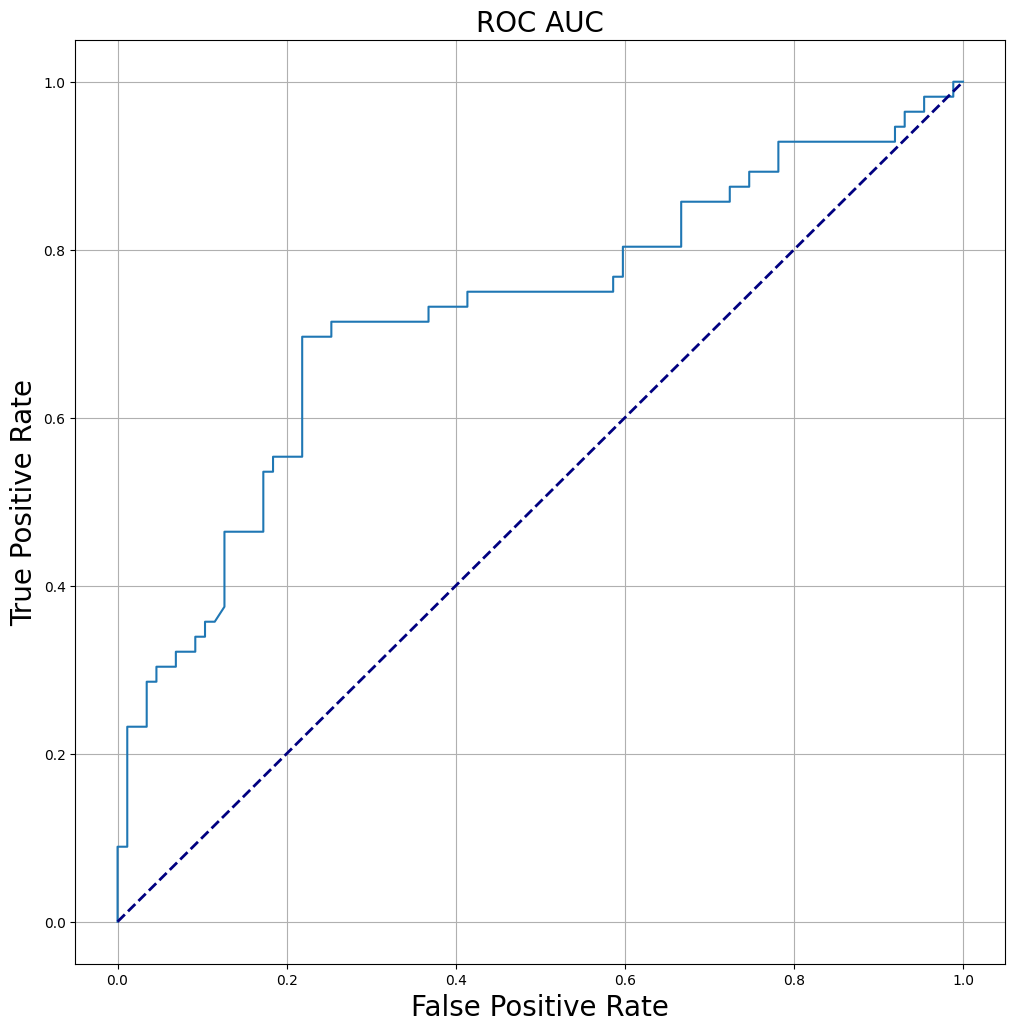

In [24]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
# Диагональная линия (случайная модель)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.grid()
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, predictions[:, 1]).round(2)

np.float64(0.72)

In [26]:
from sklearn.metrics import precision_recall_curve, auc

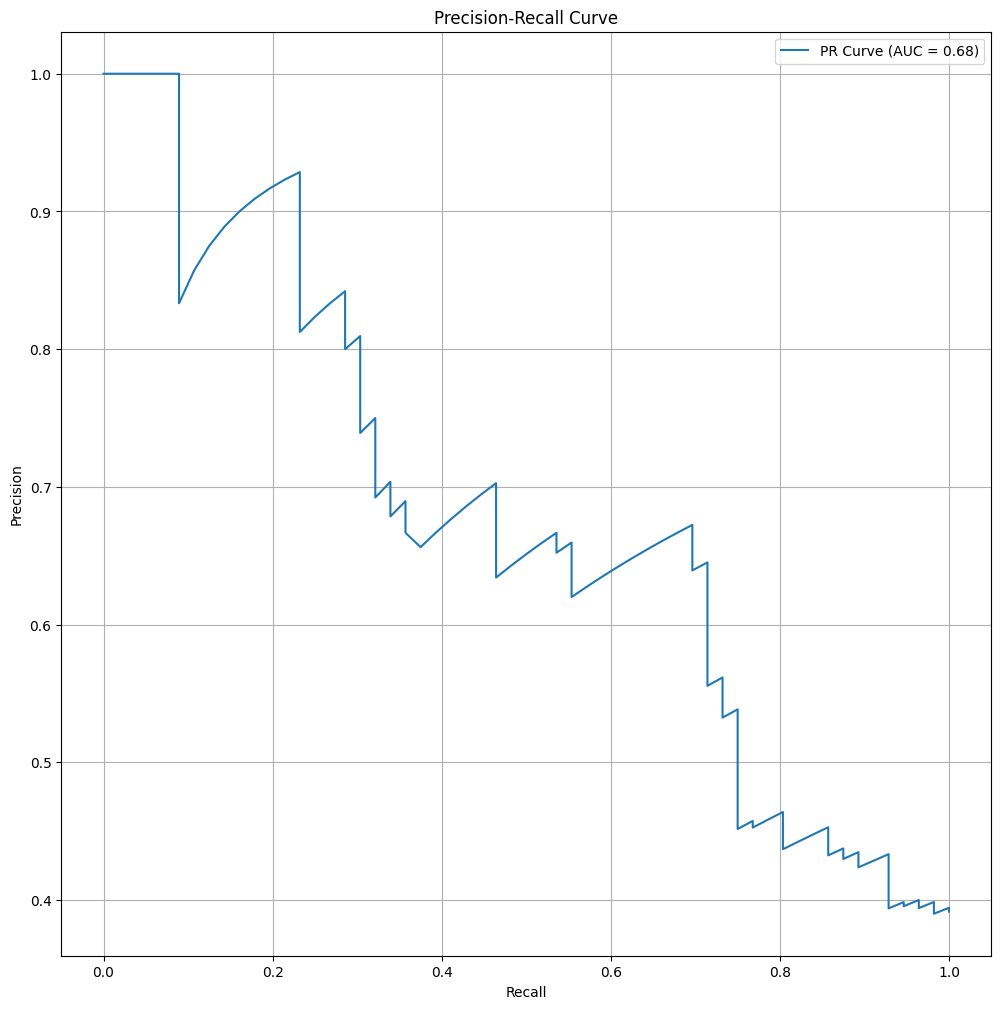

In [27]:
# Получение вероятностей
y_probs = model.predict_proba(X_test)[:, 1]

# Расчет precision и recall
precision, recall, thresholds = precision_recall_curve(Y_test, y_probs)
auc_score = auc(recall, precision)

# Построение графика
plt.figure(figsize=(12, 12))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

## 3. Снова загрузите полные данные.

Числовые данные (Numeric Data).

int64 (целые числа):

Survived (выжил/не выжил) — категориальная переменная, представленная числами (например, 0/1);

Pclass (класс билета) — категориальная переменная, представленная числами (1, 2, 3);

SibSp (количество братьев/сестер/супругов) — количественная переменная;

Parch (количество родителей/детей) — количественная переменная.

float64 (числа с плавающей точкой):

Age (возраст) — непрерывная количественная переменная;

Fare (стоимость билета) — непрерывная количественная переменная.

Категориальные данные (Categorical Data)

object (строковые/текстовые данные):

Name (имя) — номинальная категориальная переменная;

Sex (пол) — номинальная категориальная переменная (мужской/женский);

Ticket (номер билета) — номинальная категориальная переменная;

Cabin (каюта) — номинальная категориальная переменная;

Embarked (пункт посадки) — номинальная категориальная переменная.

In [28]:
df = pd.read_csv(f'{pm}{f_1}', sep = ',')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

 На целевую переменную явно  не вияют: Name(имя), Ticket(номер билета), Embarked (пункт посадки). Данные признаки являются номинальными по отношению к целевой переменной.

In [29]:
#удаляем категориальные переменные
df.drop(['Name','Ticket', 'Cabin','Embarked','PassengerId'], axis=1, inplace=True)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## 5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [31]:
# Расчитаем пропуски в %
print("Пропуски в процентах :")
(df.isna().mean() * 100).round(2)

Пропуски в процентах :


,0
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00


Пропуски имеются только в Age. Переменная непрерывная, поэтому заполним медианным значением.

In [32]:
#Заполнение медианой, Age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [33]:
# Расчитаем пропуски в %
print("Пропуски в процентах :")
(df.isna().mean() * 100).round(2)

Пропуски в процентах :


,0
Survived,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0


## 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [35]:
# Преобразуем категориальные переменные
df = pd.get_dummies(df, columns=['Pclass', 'Sex'], dtype=int)

df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0
888,0,28.0,1,2,23.4500,0,0,1,1,0
889,1,26.0,0,0,30.0000,1,0,0,0,1


In [36]:
# Расчитаем пропуски в %
print("Пропуски в процентах :")
(df.isna().mean() * 100).round(2)

Пропуски в процентах :


,0
Survived,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Pclass_1,0.0
Pclass_2,0.0
Pclass_3,0.0
Sex_female,0.0
Sex_male,0.0


## 7. Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

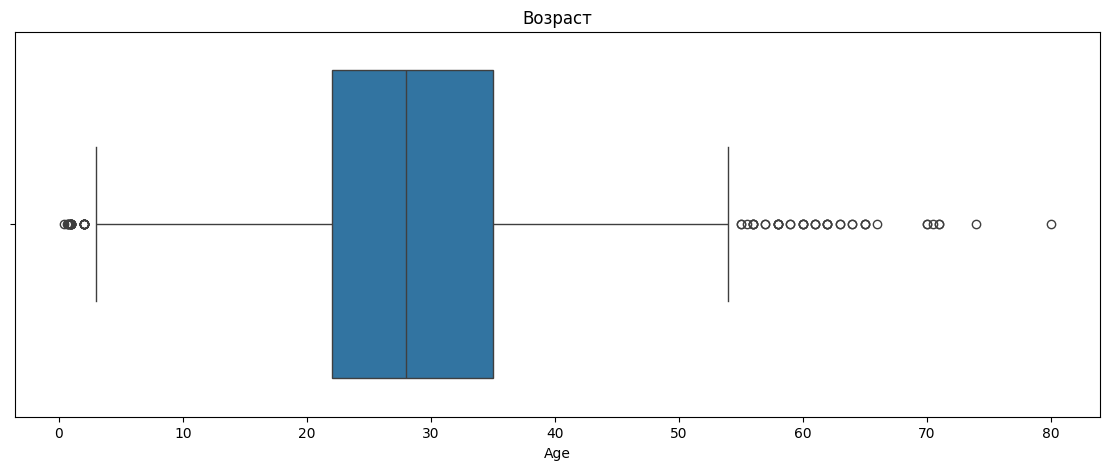

In [37]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='Age')
plt.title("Возраст")
plt.show()

Имеются существенные выбросы (лица старше 60 лет). Наличие выбросов скажется на работе модели. Следует удалить выбросы.

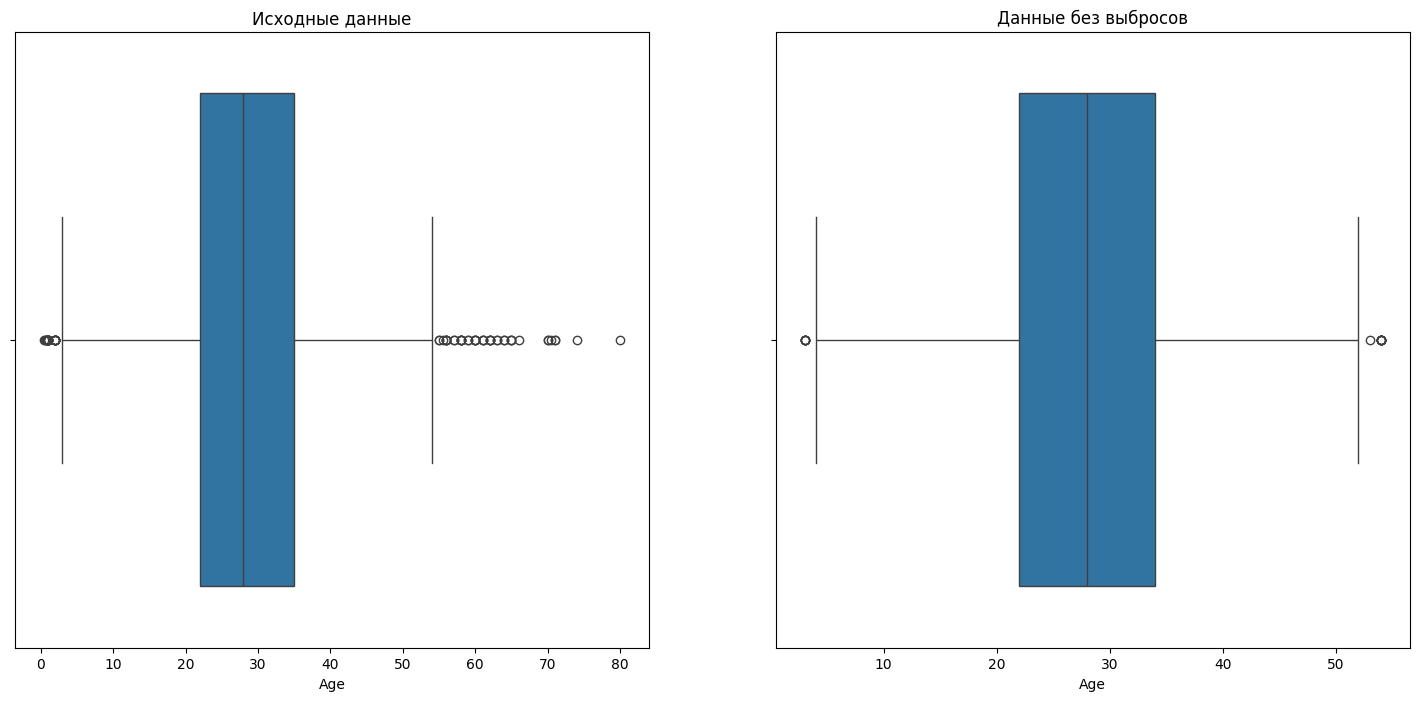

In [38]:
# Вычисляем квартили и IQR
q25_Age = df['Age'].quantile(0.25)
q75_Age = df['Age'].quantile(0.75)
iqr_Age = q75_Age - q25_Age

# Вычисляем границы
lower_bound_Age = q25_Age - (1.5 * iqr_Age)
upper_bound_Age = q75_Age + (1.5 * iqr_Age)

# Очищаем данные от выбросов
clean_df = df[
    (df['Age'] >= lower_bound_Age) &
    (df['Age'] <= upper_bound_Age)
].sort_values('Survived')

# Выделяем выбросы
outliers_Age = df[
    (df['Age'] < lower_bound_Age) |
    (df['Age'] > upper_bound_Age)
]

# Визуализируем результаты
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['Age'])
plt.title('Данные без выбросов')

plt.show()

In [39]:
df = clean_df

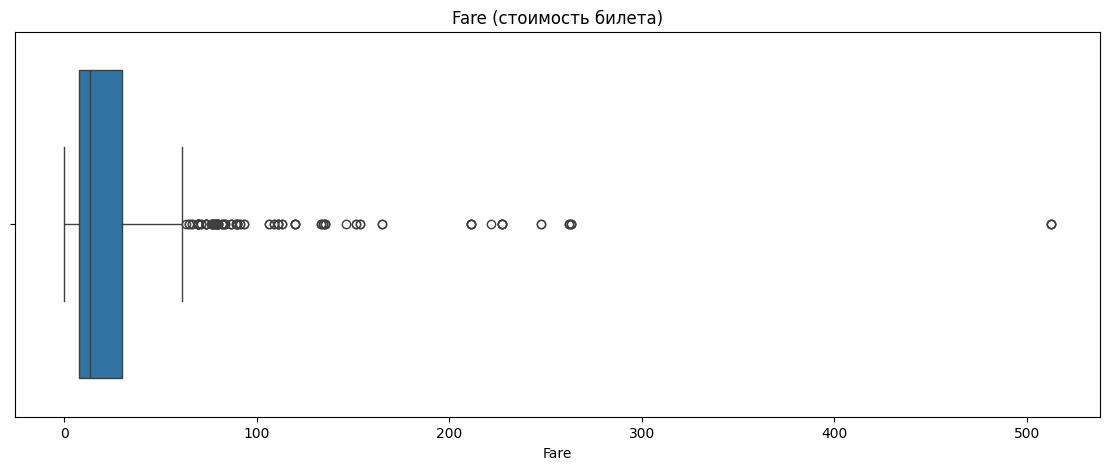

In [40]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='Fare')
plt.title("Fare (стоимость билета)")
plt.show()

Существенные выбросы. Могут повлиять на качество работы модели. Удаляем.

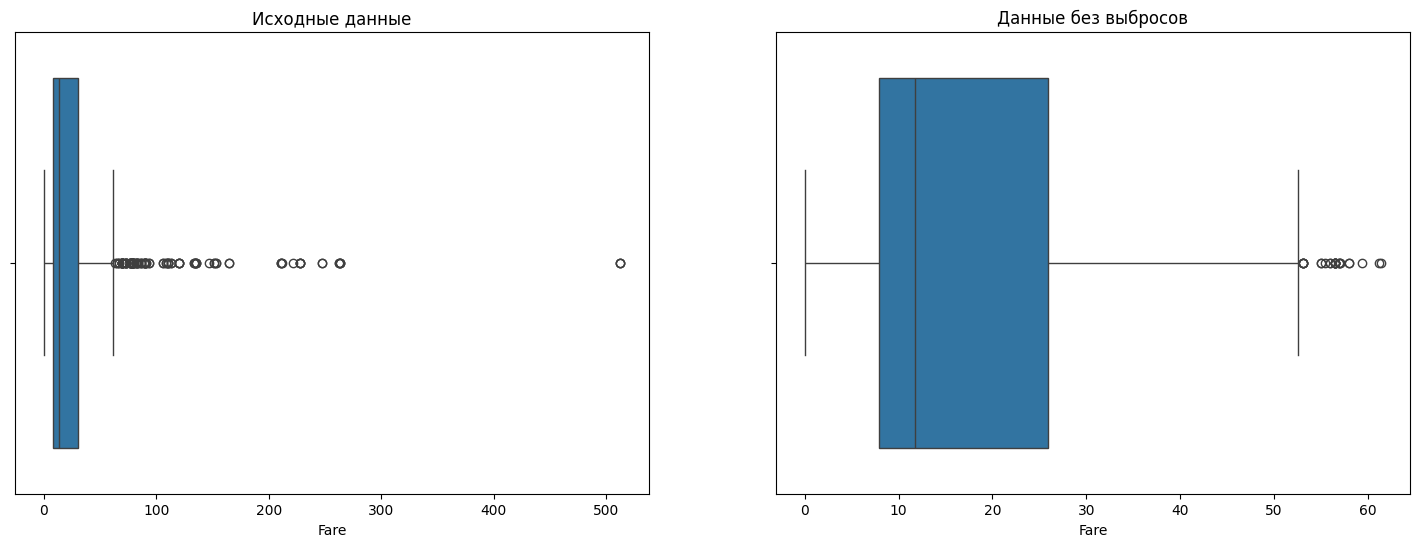

In [41]:
# Вычисляем квартили и IQR
q25_Fare = df['Fare'].quantile(0.25)
q75_Fare = df['Fare'].quantile(0.75)
iqr_Fare = q75_Fare - q25_Fare

# Вычисляем границы
lower_bound_Fare = q25_Fare - (1.5 * iqr_Fare)
upper_bound_Fare = q75_Fare + (1.5 * iqr_Fare)

# Очищаем данные от выбросов
clean_df = df[
    (df['Fare'] >= lower_bound_Fare) &
    (df['Fare'] <= upper_bound_Fare)
].sort_values('Survived')

# Выделяем выбросы
outliers_Fare = df[
    (df['Fare'] < lower_bound_Fare) |
    (df['Fare'] > upper_bound_Fare)
]

# Визуализируем результаты
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['Fare'])
plt.title('Данные без выбросов')

plt.show()

In [42]:
df=clean_df

In [43]:
# Расчитаем пропуски в %
print("Пропуски в процентах :")
(df.isna().mean() * 100).round(2)

Пропуски в процентах :


,0
Survived,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Pclass_1,0.0
Pclass_2,0.0
Pclass_3,0.0
Sex_female,0.0
Sex_male,0.0


In [44]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
854,0,44.0,1,0,26.0000,0,1,0,1,0
859,0,28.0,0,0,7.2292,0,0,1,0,1
0,0,22.0,1,0,7.2500,0,0,1,0,1
885,0,39.0,0,5,29.1250,0,0,1,1,0
884,0,25.0,0,0,7.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
869,1,4.0,1,1,11.1333,0,0,1,0,1
871,1,47.0,1,1,52.5542,1,0,0,1,0
874,1,28.0,1,0,24.0000,0,1,0,1,0
875,1,15.0,0,0,7.2250,0,0,1,1,0


## 8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [45]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.9 MB/s eta 0:00:00


In [46]:
phik_overview = df.phik_matrix(interval_cols=['Age','Fare'])
phik_overview

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Survived,1.000000,0.167532,0.161459,0.133547,0.374241,0.280224,0.227653,0.400250,0.713155,0.713155
Age,0.167532,1.000000,0.432508,0.460813,0.477513,0.358310,0.237536,0.401137,0.152980,0.152980
SibSp,0.161459,0.432508,1.000000,0.415666,0.692509,0.049236,0.157791,0.216241,0.294063,0.294063
Parch,0.133547,0.460813,0.415666,1.000000,0.525404,0.010589,0.062499,0.046111,0.279270,0.279270
Fare,0.374241,0.477513,0.692509,0.525404,1.000000,0.867819,0.563404,0.809720,0.314505,0.314505
Pclass_1,0.280224,0.358310,0.049236,0.010589,0.867819,1.000000,0.310918,0.724766,0.000000,0.000000
Pclass_2,0.227653,0.237536,0.157791,0.062499,0.563404,0.310918,1.000000,0.905627,0.201933,0.201933
Pclass_3,0.400250,0.401137,0.216241,0.046111,0.809720,0.724766,0.905627,1.000000,0.132913,0.132913
Sex_female,0.713155,0.152980,0.294063,0.279270,0.314505,0.000000,0.201933,0.132913,1.000000,0.999987
Sex_male,0.713155,0.152980,0.294063,0.279270,0.314505,0.000000,0.201933,0.132913,0.999987,1.000000


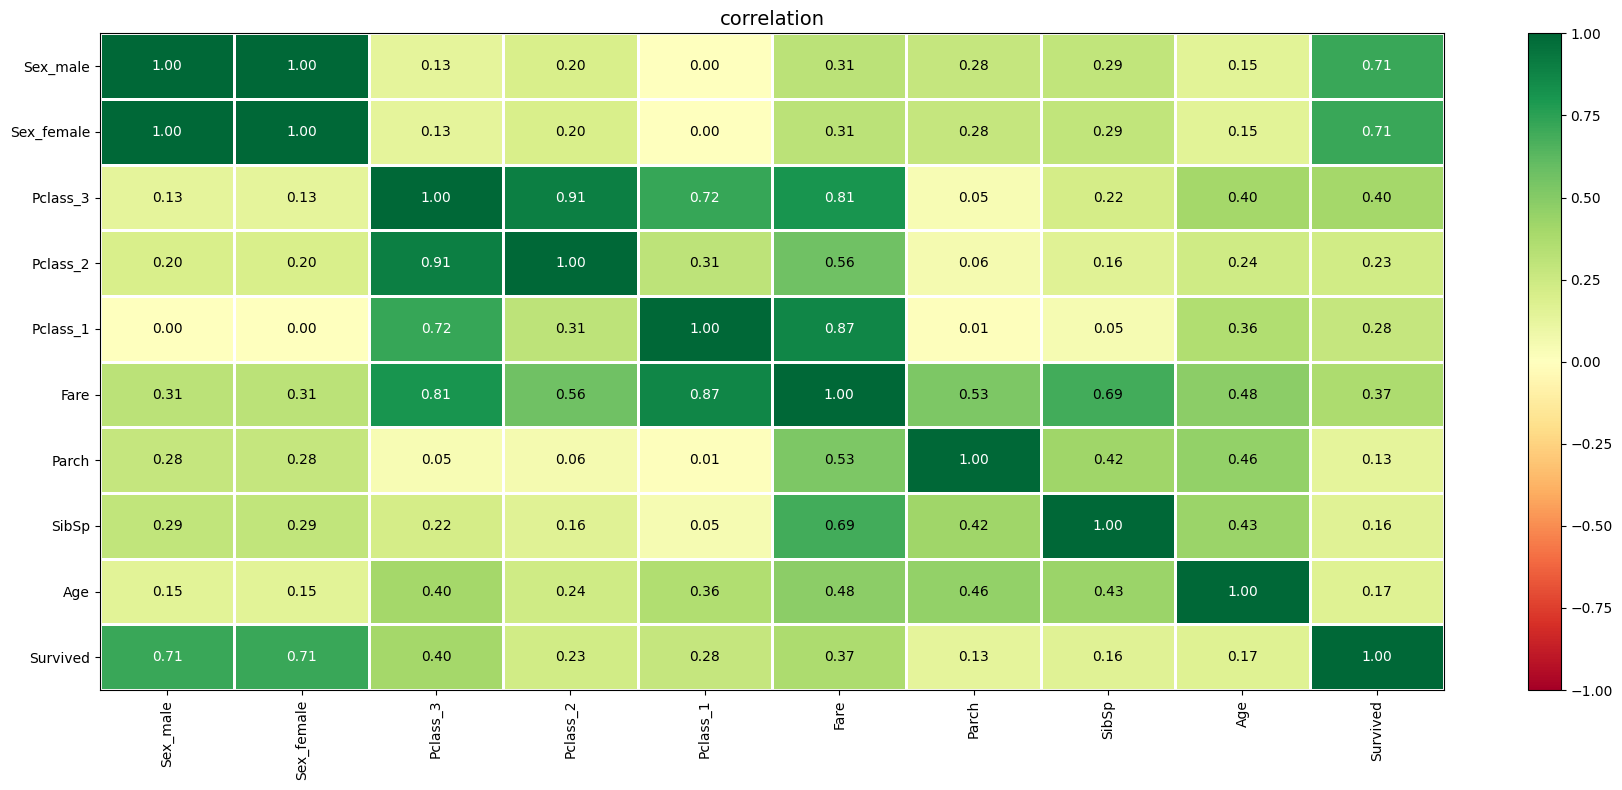

In [47]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(18, 8))

Сильно коррелируют с величиной Survived величины Sex_female и Sex_male, что вполне логично.

Имеется корреляция с классом кают. Можно предположить, что здесь связь с выживаемость модет носить как топографический характе (класс кают ближе к шлюпкам) или через цену билета (возможно, приоритет спасения зависел от состоятельности человека).

Сдержанная корреляция Survived с Fare, что заставляет усомниться в предположении о приорите спасения состоятельных людей.


Интересное, что корреляция с Age невысокая. Хотя, казалось бы, что возраст влияет на выживаемость.


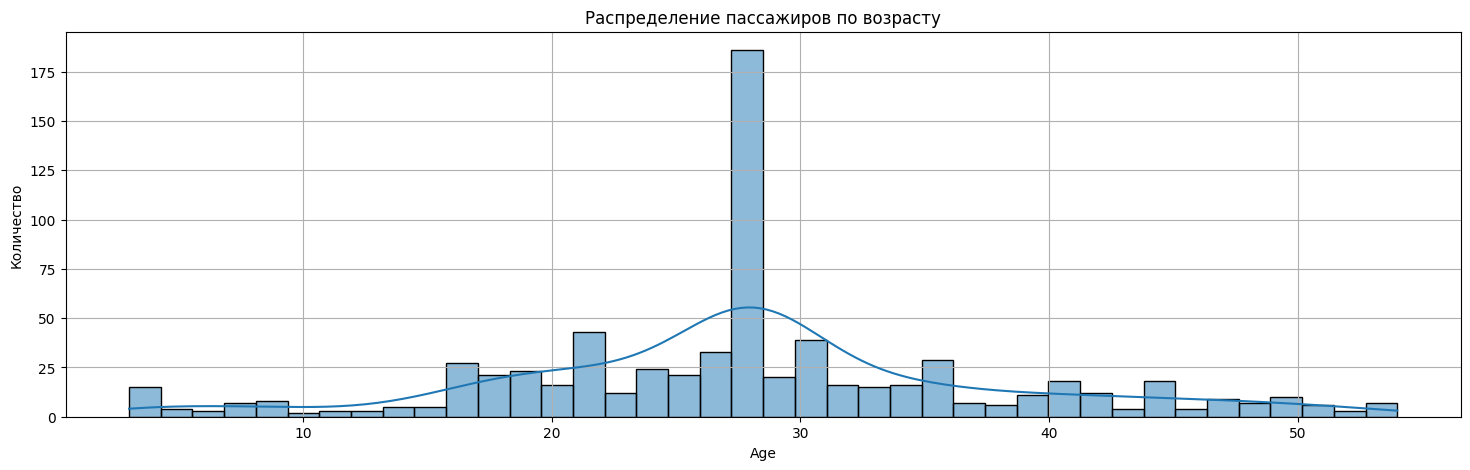

In [48]:
plt.figure(figsize=[18,5])
sns.histplot(data=df, x="Age", bins=40, kde=True)
plt.title("Распределение пассажиров по возрасту")
plt.ylabel("Количество")
plt.grid()
plt.show()

Как видим из графика больше всего пассажиров в возрасте 27 лет.

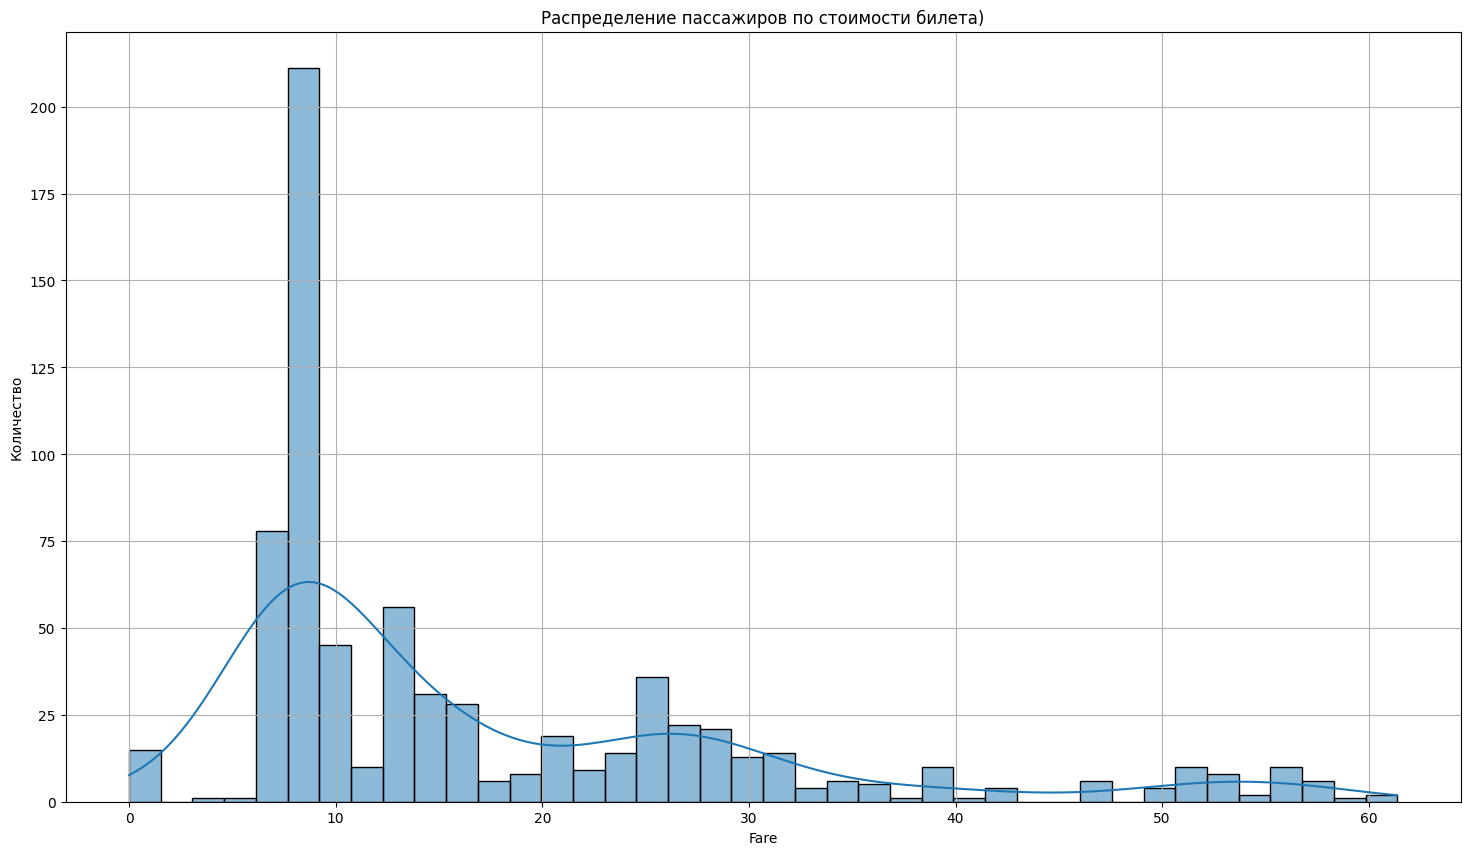

In [49]:
plt.figure(figsize=[18,10])
sns.histplot(data=df, x="Fare", bins=40, kde=True)
plt.title("Распределение пассажиров по стоимости билета)")
plt.ylabel("Количество")
plt.grid()
plt.show()

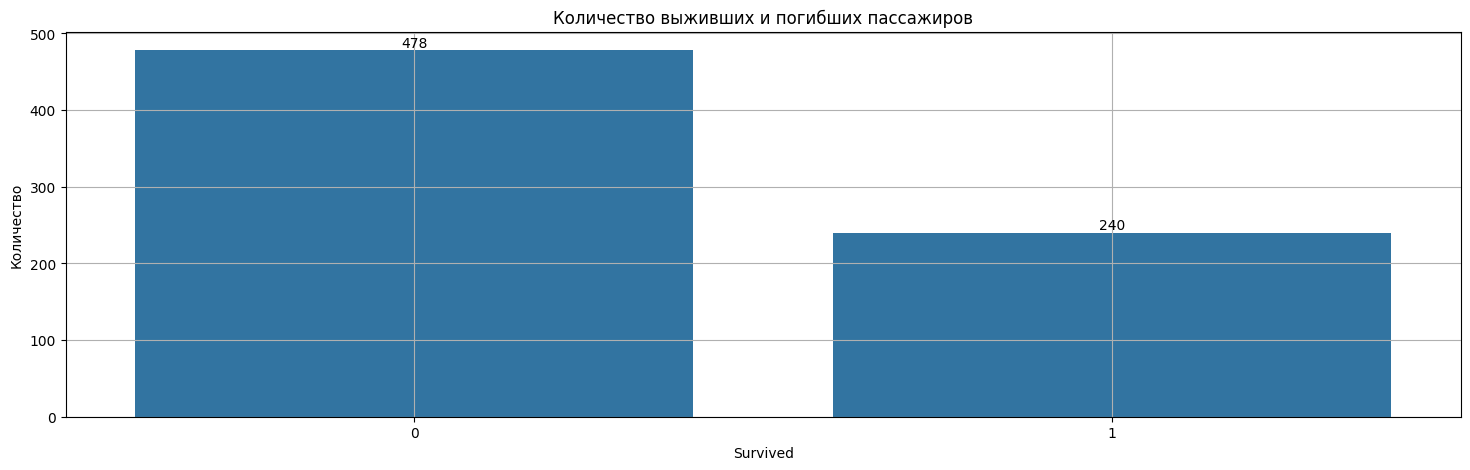

In [50]:
plt.figure(figsize=[18,5])
ax = sns.countplot(data=df, x="Survived")
ax.bar_label(ax.containers[0])
plt.title("Количество выживших и погибших пассажиров")
plt.ylabel("Количество")
plt.grid()
plt.show()

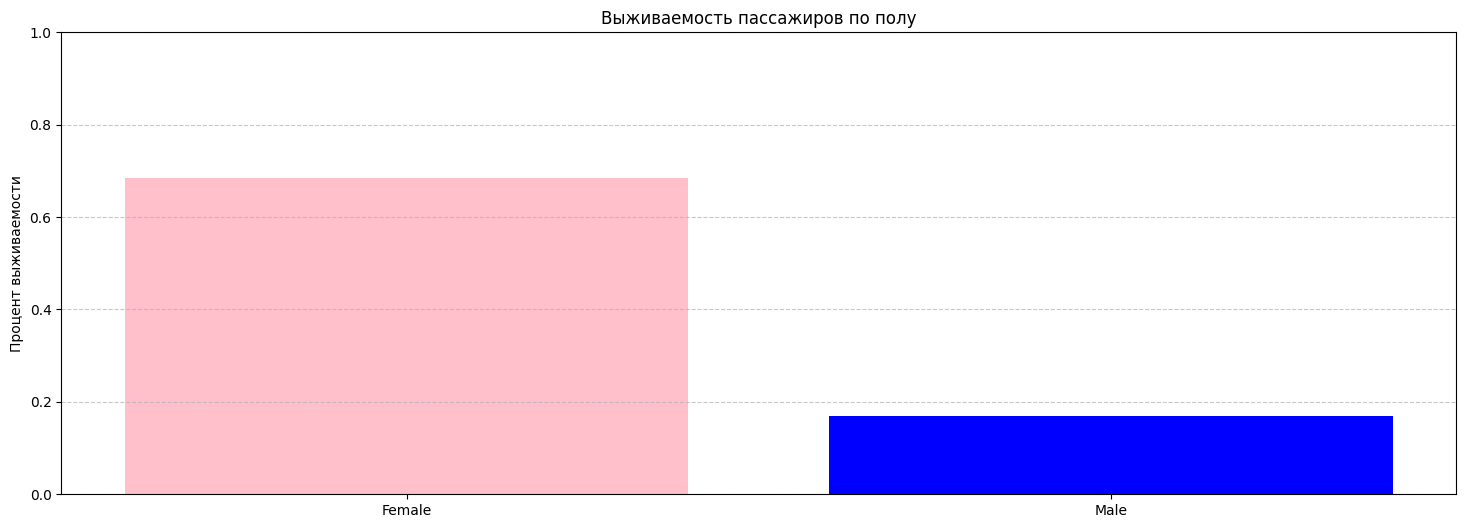

In [51]:
# Группируем данные по полу и вычисляем процент выживаемости
female_survival = df[df['Sex_female'] == 1]['Survived'].mean()
male_survival = df[df['Sex_male'] == 1]['Survived'].mean()

# Создаем график
plt.figure(figsize=(18, 6))
plt.bar(['Female', 'Male'], [female_survival, male_survival], color=['pink', 'blue'])

# Добавляем подписи
plt.title('Выживаемость пассажиров по полу')
plt.ylabel('Процент выживаемости')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показываем график
plt.show()

График показывают, что среди выживших больше всего женщин.

## 9. *Попробуйте математически преобразовать признак Age.

In [52]:
df['Age'] = pd.cut(
    df['Age'],
    bins=[0, 20, 40, float('inf')],
    labels=[1, 2, 3],
    right=False
)


In [53]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
854,0,3,1,0,26.0000,0,1,0,1,0
859,0,2,0,0,7.2292,0,0,1,0,1
0,0,2,1,0,7.2500,0,0,1,0,1
885,0,2,0,5,29.1250,0,0,1,1,0
884,0,2,0,0,7.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
869,1,1,1,1,11.1333,0,0,1,0,1
871,1,3,1,1,52.5542,1,0,0,1,0
874,1,2,1,0,24.0000,0,1,0,1,0
875,1,1,0,0,7.2250,0,0,1,1,0


In [54]:
df = pd.get_dummies(df, columns=['Age'], dtype=int)

In [55]:
df

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_1,Age_2,Age_3
854,0,1,0,26.0000,0,1,0,1,0,0,0,1
859,0,0,0,7.2292,0,0,1,0,1,0,1,0
0,0,1,0,7.2500,0,0,1,0,1,0,1,0
885,0,0,5,29.1250,0,0,1,1,0,0,1,0
884,0,0,0,7.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,1,1,11.1333,0,0,1,0,1,1,0,0
871,1,1,1,52.5542,1,0,0,1,0,0,0,1
874,1,1,0,24.0000,0,1,0,1,0,0,1,0
875,1,0,0,7.2250,0,0,1,1,0,1,0,0


## 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [56]:
# Загрузка данных

X = df[['Age_1', 'Age_2', 'Age_3','SibSp', 'Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male']]
Y = df['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [57]:
# Обучение модели
model = LogisticRegression().fit(X_train, Y_train)

In [58]:
# Для бинарной классификации
pred_proba = model.predict_proba(X_test)[:, 1]  # вероятности положительного класса
pred_classes = model.predict(X_test)  # предсказанные классы

accuracy = accuracy_score(Y_test, pred_classes)
f1 = f1_score(Y_test, pred_classes)
roc_auc = roc_auc_score(Y_test, pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.8056
F1 score: 0.6744
ROC AUC: 0.8246


Оценки стали заметно лучше по сравнению с первой моделью.

In [59]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

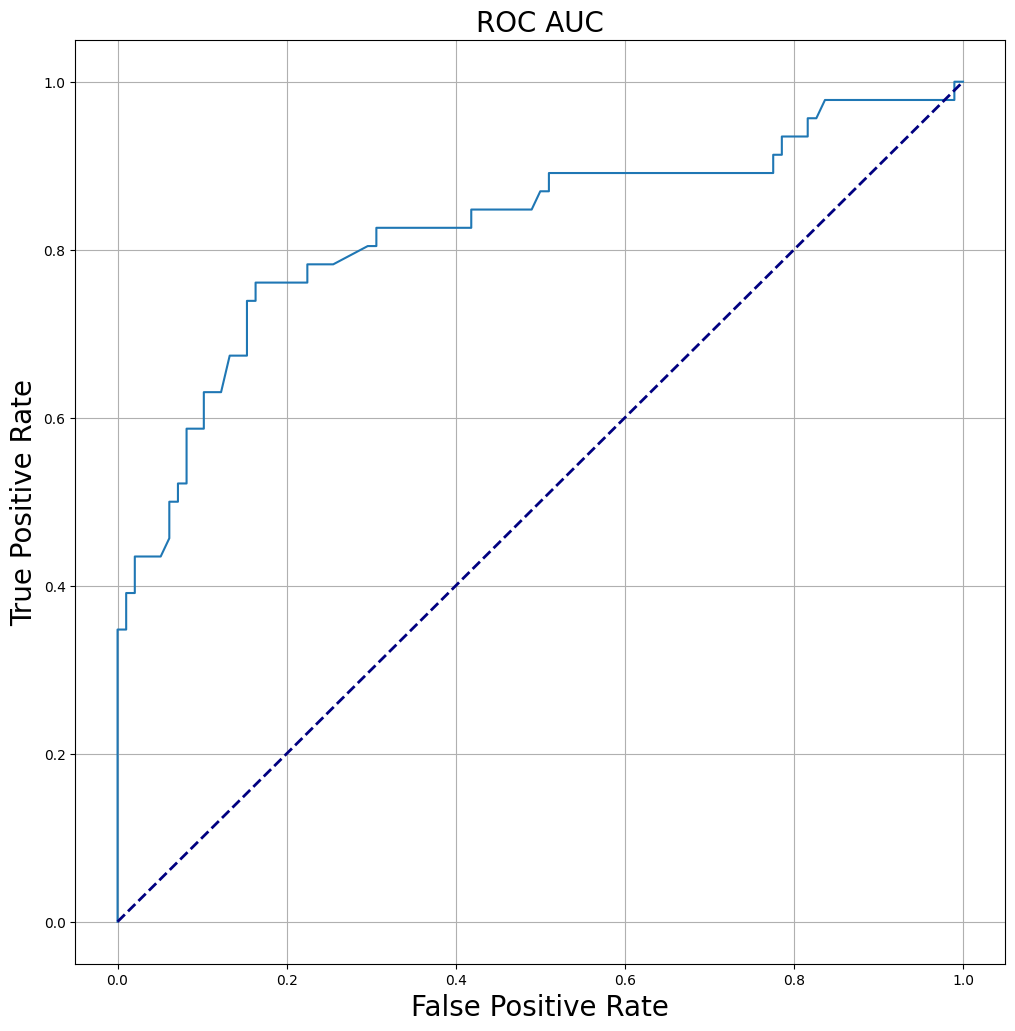

In [60]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
# Диагональная линия (случайная модель)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.grid()
plt.show()

In [61]:
roc_auc_score(Y_test, predictions[:, 1]).round(2)

np.float64(0.82)

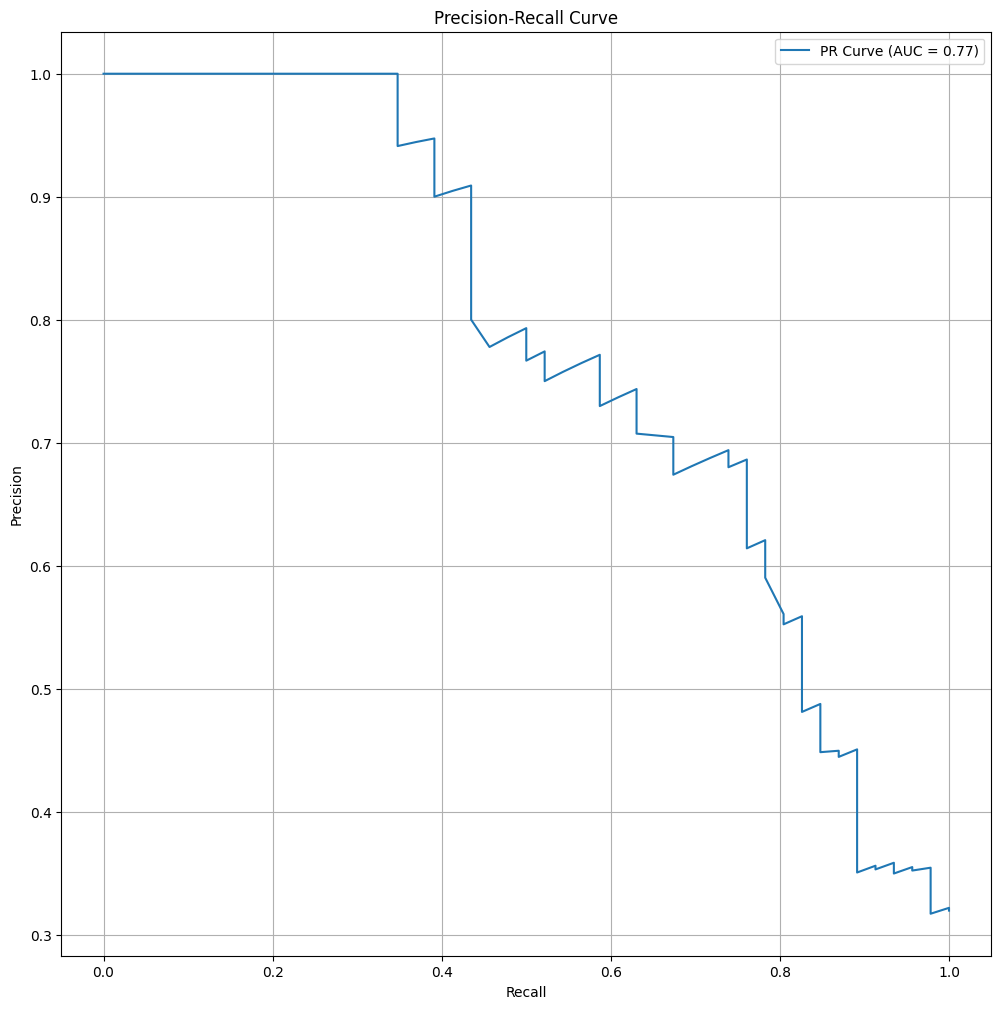

In [62]:
# Получение вероятностей
y_probs = model.predict_proba(X_test)[:, 1]

# Расчет precision и recall
precision, recall, thresholds = precision_recall_curve(Y_test, y_probs)
auc_score = auc(recall, precision)

# Построение графика
plt.figure(figsize=(12, 12))
plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

## 11. Сформулируйте выводы по проделанной работе.



### a) Кратко опишите какие преобразования были сделаны и почему.



В ходе работы была произведена обработка данных и построенны две модели.  

Первая модель не учитывала категориальные данные. Данные для первой модели не проходили предобработку в полной мере. Имеющиеся в датасете пропуски просто были удалены. Данная работа являлась грубой очисткой данных.

Вторая модель учитывала только данные, которые явно влияли на целевую переменную, включая категориальные. Пропуски в в данных были заполнены. данные подверглись обработке: были удалены выбросы, заполнены пропуски в данных; была преобразована величина Age, что дало существенное повышение качеству и стабильности работы модели.

### b) Сравните метрики моделей из п. 2 и п. 10. c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.

**Accuracy (точность)**

До предобработки: 0.6993 (69.93%);

После предобработки: 0.8056 (80.56%).

**F1-score**

До предобработки: 0.5474;

После предобработки: 0.6744.

**ROC AUC**

До предобработки: 0.7228;

После предобработки: 0.8246.

**AUC-score**

До предобработки: 0.68;

После предобработки: 0.77.

**Анализ изменений**:

1. **Общее улучшение качества модели.**

Все метрики демонстрируют значительное улучшение после предобработки данных, что говорит о правильности применённых методов очистки и преобразования.

2. **Точность (Accuracy)**

Рост на 10.63% (с 69.93% до 80.56%);

Существенное улучшение показывает, что модель стала лучше классифицировать данные в целом.

3. **F1-score**

Увеличение на 0.127 (с 0.5474 до 0.6744);

Улучшение показателя говорит о более сбалансированной работе модели по отношению к precision и recall.

4. **ROC AUC и AUC-score**

ROC AUC вырос на 0.1018 (с 0.7228 до 0.8246);

AUC-score увеличился на 0.09 (с 0.68 до 0.77);

Значительный рост этих метрик указывает на улучшение способности модели разделять классы.

Выводы:
Предобработка данных оказала положительное влияние на производительность модели. Особенно заметный прогресс наблюдается по метрике точности (Accuracy), что говорит о существенном улучшении качества классификации.